In [1]:
from main.compiling.compilers.AncillaPerCheckCompiler import AncillaPerCheckCompiler
from main.compiling.noise.models.CircuitLevelNoise import CircuitLevelNoise
from main.compiling.syndrome_extraction.extractors.ancilla_per_check.mixed.CxCyCzExtractor import CxCyCzExtractor
from main.codes.tic_tac_toe.HoneycombCode import HoneycombCode
from main.codes.tic_tac_toe.gauge_honeycomb_code import GaugeHoneycombCode
from main.codes.tic_tac_toe.FloquetColourCode import FloquetColourCode
from main.codes.tic_tac_toe.TicTacToeCode import TicTacToeCode
from main.utils.enums import State
from main.building_blocks.pauli import Pauli
from main.building_blocks.pauli.PauliLetter import PauliLetter
import stim
import sinter 
import matplotlib.pyplot as plt
import numpy as np
from beliefmatching import BeliefMatchingSinterDecoder
from main.utils.Colour import Blue, Green, Red
import os
from phenomenological_noise_experiments.threshold_plot import *
from sinter._csv_out import CSV_HEADER




## Import and compress data

In [2]:
#os.system(f"cp resume_31_7_gauge/data_Gauge2FloquetColourCode.csv resume_31_7_gauge/data_Gauge2FloquetColourCode_backup.csv")
#os.system(f"cp resume_31_7_gauge/data_Gauge3FloquetColourCode.csv resume_31_7_gauge/data_Gauge3FloquetColourCode_backup.csv")
#os.system(f"sinter combine resume_31_7_gauge/data_Gauge2FloquetColourCode.csv resume_31_7_gauge/data_Gauge3FloquetColourCode.csv > resume_31_7_gauge/compress_data.csv")
#os.system(f"sinter combine resume_15_3/data.csv > resume_15_3/compress_data.csv")
#os.system(f"rm resume_15_3/data.csv")
#os.system(f"mv resume_15_3/compress_data.csv resume_15_3/data.csv")
#os.system(f"cp data_31_7/all_data_final.csv data_31_7/all_data_final_backup.csv")
#os.system(f"sinter combine re")
#os.system(f"sinter combine resume_31_7_extra/data_HoneycombCode.csv data_31_7/all_data_final.csv > data_31_7/all_data_final_new.csv")
samples = sinter.stats_from_csv_files('data_31_7/all_data_final_new.csv')
biases = []

#os.system(f"rm data_31_7/all_data_final.csv")
#os.system(f"mv resume_31_7/all_data_final_2.csv data_31_7/all_data_final.csv")
#os.system(f"sinter combine data_31_7/data_without_gauge.csv  > combined_data/data.csv")
#"""
#samples = sinter.stats_from_csv_files('combined_data/data.csv')
#os.system(f"cp data_31_7/all_data_and_gauge.csv data_31_7/all_data_and_gauge_backup.csv"
#samples = sinter.stats_from_csv_files('data_31_7/all_data_final.csv')
#os.system(f"sinter combine resume_31_7_dephasing/data_HoneycombCode.csv resume_31_7_dephasing/data_FloquetColourCode.csv data_31_7/data_test.csv > data_31_7/all_data.csv")
#os.system(f"sinter combine resume_31_7_gauge_bug_fix/data_Gauge2FloquetColourCode.csv resume_31_7_gauge_bug_fix/data_Gauge3FloquetColourCode.csv resume_31_7_gauge_bug_fix/data_Gauge3HoneycombCode.csv  resume_31_7_gauge_bug_fix/data_Gauge2HoneycombCode.csv data_31_7/data_without_gauge.csv > data_31_7/all_data_final.csv")
#samples = sinter.stats_from_csv_files('data_31_7/all_data_and_gauge.csv')
#for sample in samples:
#    if sample.json_metadata['bias_type'] == "depolarizing_vs_dephasing":
#        sample.json_metadata['bias_type'] = "depolarizing_vs_y"

#with open('data_31_7/data_test.csv', 'w') as f:
#    print(sinter.CSV_HEADER, file=f, flush=True)
#    for sample in samples:
#        print(sample.to_csv_line(), file=f, flush=True)
#samples_hcc_dephawith open('combined_data/data_test.csv', 'w') as f:

#        print(sample.to_csv_line())sing = sinter.stats_from_csv_files('resume_31_7_dephasing/data_HoneycombCode.csv')

#samples_fcc_dephasing = sinter.stats_from_csv_files('resume_31_7_dephasing/data_FloquetColourCode.csv')
#samples_fcc_2 = sinter.stats_from_csv_files('resume_31_7_gauge_bug_fix/data_Gauge2FloquetColourCode.csv')
#samples_hcc_2 = sinter.stats_from_csv_files('resume_31_7_gauge_bug_fix/data_Gauge2HoneycombCode.csv')
#samples_fcc_3 = sinter.stats_from_csv_files('resume_31_7_gauge_bug_fix/data_Gauge3FloquetColourCode.csv')
#samples_hcc_3 = sinter.stats_from_csv_files('resume_31_7_gauge_bug_fix/data_Gauge3HoneycombCode.csv')
"""
print(len(samples))
for sample in samples: 
    print(sample.json_metadata['code'])
    if sample.json_metadata['code'] == "Gauge2FloquetColourCode":
        samples.remove(sample)    
    if sample.json_metadata['code'] == "Gauge3FloquetColourCode":
        samples.remove(sample)
    if sample.json_metadata['code'] == "Gauge3HoneycombCode":
        samples.remove(sample)
    if sample.json_metadata['code'] == "Gauge2HoneycombCode":
        samples.remove(sample)
with open('data_31_7/data_without_gauge.csv', 'w') as f:
    print(sinter.CSV_HEADER,file=f,flush=True)
    for sample in samples:
        if sample.json_metadata['code'] not in ["Gauge2FloquetColourCode","Gauge3FloquetColourCode","Gauge3HoneycombCode", "Gauge2HoneycombCode"]:
            print(sample.to_csv_line(),file=f,flush=True)

#samples
biases = []
#samples = sinter.stats_from_csv_files('data_31_7/all_data_and_gauge.csv')


"""
for sample in samples:
    if sample.json_metadata['bias'] not in biases:
        biases.append(sample.json_metadata['bias'])
biases.sort()
"""
all_thresholds_hcc = dict()
all_thresholds_fcc = dict()
all_thresholds_hcc['pymatching'] = dict()
all_thresholds_hcc['beliefmatching'] = dict()
all_thresholds_fcc['pymatching'] = dict()
all_thresholds_fcc['beliefmatching'] = dict()
"""


"\nall_thresholds_hcc = dict()\nall_thresholds_fcc = dict()\nall_thresholds_hcc['pymatching'] = dict()\nall_thresholds_hcc['beliefmatching'] = dict()\nall_thresholds_fcc['pymatching'] = dict()\nall_thresholds_fcc['beliefmatching'] = dict()\n"

### Depolarizing vs measurement noise with gauge fixing

[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 16, 16, 16, 16, 16, 16, 16, 16]
[0.00145, 0.0019, 0.00235, 0.0028, 0.00325, 0.0037, 0.00415, 0.0046, 0.00505, 0.0055, 0.00595, 0.0064, 0.00685, 0.0073, 0.00775, 0.0082, 0.00865, 0.0091, 0.00955, 0.00145, 0.0019, 0.00235, 0.0028, 0.00325, 0.0037, 0.00415, 0.0046, 0.00505, 0.0055, 0.00595, 0.0064, 0.00685, 0.0073, 0.00775, 0.0082, 0.00865, 0.0091, 0.005, 0.0055, 0.006, 0.0065, 0.007, 0.0075, 0.008, 0.0085]
[6e-05, 0.00029, 0.00072, 0.00174, 0.00372, 0.00641, 0.0112, 0.01791, 0.02597, 0.0384, 0.05348, 0.06907, 0.089, 0.11523444248643792, 0.14068024920020206, 0.17088779494143608, 0.20255816295699466, 0.22980942189029804, 0.2646779803942237, 0.0, 0.0, 7e-05, 0.00013, 0.00046, 0.00109, 0.00252, 0.00531, 0.00964, 0.01749, 0.02944, 0.04825, 0.07336, 0.10733596532635283, 0.14354670066029762, 0.19208021179518955, 0.2387925315136006, 0.28401001660054587, 0.00348, 0.008

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

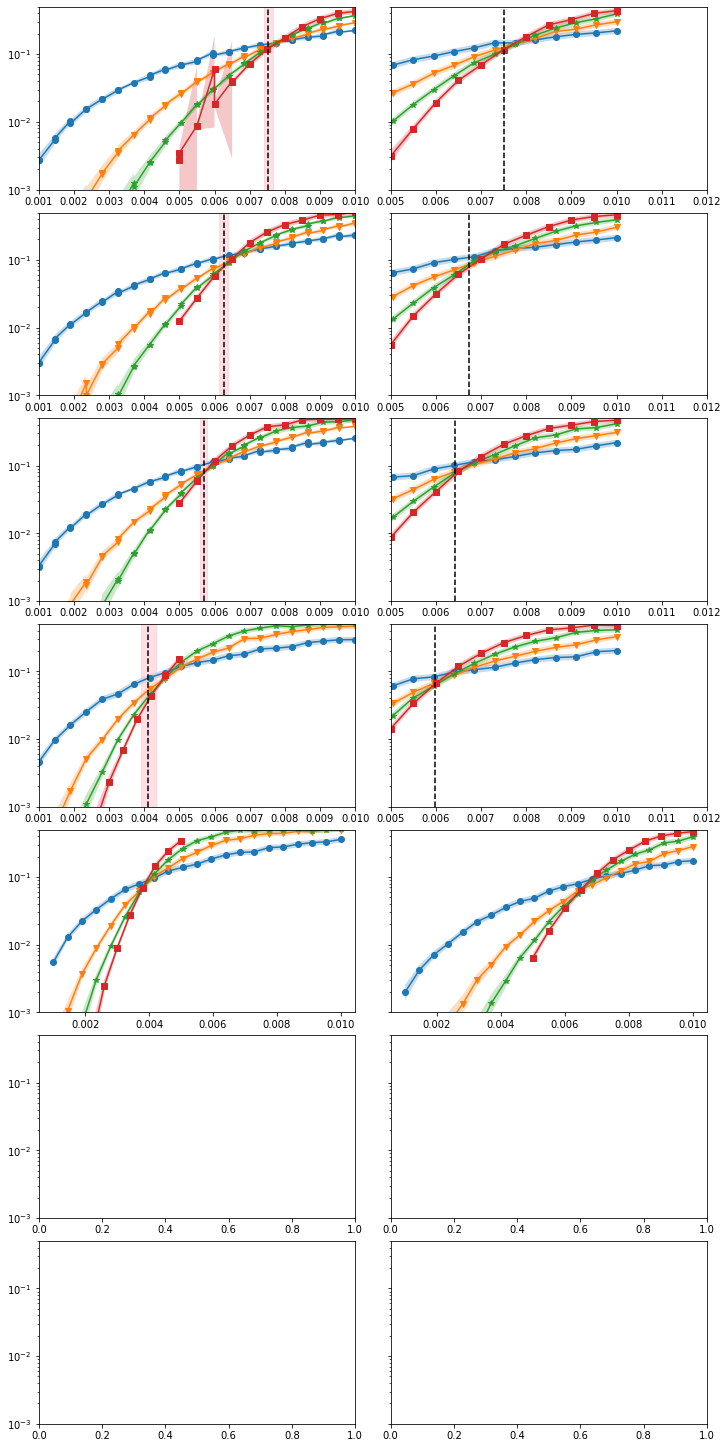

In [3]:
fig, axis = plt.subplots(7, 2, figsize=(10, 20), sharey=True, constrained_layout=True)
thresholds_hcc = dict()
thresholds_fcc = dict()

def plot_threshold(ax, stats, filter_func):  # , filter_func, x_func):
    sinter.plot_error_rate(
        ax=ax,
        stats=stats,
        group_func=lambda stat: f"d={stat.json_metadata['distance']}",
        filter_func=filter_func,
        x_func=lambda stat: stat.json_metadata['p'])
    ax.set_yscale('log')


axis[0][0].set_ylim(0.001, 0.5)

for index, bias in enumerate(biases):
    def filter_func_fccg2(s): return s.decoder == 'pymatching' and s.json_metadata['code'] == 'Gauge2FloquetColourCode' and s.json_metadata[
        'bias'] == bias and s.json_metadata['bias_type'] == 'measurement_vs_data_qubit'

    def filter_func_fccg3(s): return s.decoder == 'pymatching' and s.json_metadata['code'] == 'Gauge3FloquetColourCode' and s.json_metadata[
        'bias'] == bias and s.json_metadata['bias_type'] == 'measurement_vs_data_qubit'

    def filter_func_hccg2(s): return s.decoder == 'pymatching' and s.json_metadata['code'] == 'Gauge2HoneycombCode' and s.json_metadata[
        'bias'] == bias and s.json_metadata['bias_type'] == 'measurement_vs_data_qubit'

    def filter_func_hccg3(s): return s.decoder == 'pymatching' and s.json_metadata['code'] == 'Gauge3HoneycombCode' and s.json_metadata[
        'bias'] == bias and s.json_metadata['bias_type'] == 'measurement_vs_data_qubit'

    def filter_func_hcc(s): return s.decoder == 'pymatching' and s.json_metadata['code'] == 'HoneycombCode' and s.json_metadata[
        'bias'] == bias and s.json_metadata['bias_type'] == 'measurement_vs_data_qubit'

    def filter_func_fcc(s): return s.decoder == 'pymatching' and s.json_metadata['code'] == 'FloquetColourCode' and s.json_metadata[
        'bias'] == bias and s.json_metadata['bias_type'] == 'measurement_vs_data_qubit'

    plot_threshold(axis[index][0], samples, filter_func_hcc)
    plot_threshold(axis[index][1], samples, filter_func_fcc)

    for ax in axis[index]:

        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + 
                        ax.get_xticklabels() + ax.get_yticklabels()):
                item.set_fontsize(10)
    if bias < 7:
        thresholds_hcc[bias],err_hcc = get_one_threshold(samples, filter_func_hcc, 1, 0.001, 0.01, 5)
        thresholds_fcc[bias],err_fcc = get_one_threshold(samples, filter_func_fcc, 1, 0.001, 0.01, 5)
        print(err_hcc)
        axis[index][0].axvline(x=thresholds_hcc[bias], color="black", linestyle="dashed")
        axis[index][0].axvspan(
                thresholds_hcc[bias]-err_hcc, thresholds_hcc[bias]+err_hcc, alpha=0.5, color='pink'
            )
        axis[index][1].axvline(x=thresholds_fcc[bias], color="black", linestyle="dashed")
    elif bias < 100:
        thresholds_hcc[bias] = get_one_threshold(samples, filter_func_hcc, 1, 0.003, 0.07, 5)
        thresholds_fcc[bias] = get_one_threshold(samples, filter_func_fcc, 1, 0.004, 0.012, 5)

        axis[index][0].axvline(x=thresholds_hcc[bias], color="black", linestyle="dashed")
        axis[index][1].axvline(x=thresholds_fcc[bias], color="black", linestyle="dashed")
        
    else:
        thresholds_hcc[bias] = get_one_threshold(samples, filter_func_hcc, 1, 0.003, 0.07, 5)
        thresholds_fcc[bias] = get_one_threshold(samples, filter_func_fcc, 1, 0.005, 0.015, 5)

        axis[index][0].axvline(x=thresholds_hcc[bias], color="black", linestyle="dashed")
        axis[index][1].axvline(x=thresholds_fcc[bias], color="black", linestyle="dashed")

    axis[index][0].set_xlim(0.001, 0.01)
    axis[index][1].set_xlim(0.005, 0.012)
all_thresholds_hcc['pymatching']['depolarizing_vs_measurement'] = thresholds_hcc
all_thresholds_fcc['pymatching']['depolarizing_vs_measurement'] = thresholds_fcc


[8, 8, 8, 8, 12, 12, 12, 16, 16, 16]
[0.005, 0.004, 0.006, 0.007, 0.004, 0.005, 0.006, 0.004, 0.005, 0.006]
[0.09893263969862769, 0.03996212121212121, 0.1830805773798648, 0.28305555555555556, 0.019678341547257835, 0.08303100263852242, 0.2247863247863248, 0.009270833333333334, 0.07355491329479769, 0.25062282012954656]
[8, 8, 8, 12, 12, 16, 16]
[0.003467, 0.003933, 0.0044, 0.003467, 0.003933, 0.003467, 0.003933]
[0.14303329223181258, 0.21177384884398678, 0.29384301138021596, 0.13892280558947226, 0.24225690276110445, 0.14301945746342848, 0.298836862511184]
[8, 8, 8, 12, 12, 12, 16, 16]
[0.003, 0.004, 0.005, 0.003, 0.004, 0.005, 0.003, 0.004]
[0.04314493802972869, 0.14192382541006393, 0.2954808806488992, 0.015144273851484556, 0.10583681369053682, 0.2984308131241084, 0.004874969652828356, 0.06958160083160084]
[8, 8, 8, 8, 8, 8, 12, 12, 12, 12, 12, 12, 16, 16, 16, 16, 16, 16]
[0.002, 0.003, 0.001444, 0.001889, 0.002333, 0.002778, 0.002, 0.003, 0.001444, 0.001889, 0.002333, 0.002778, 0.002, 0

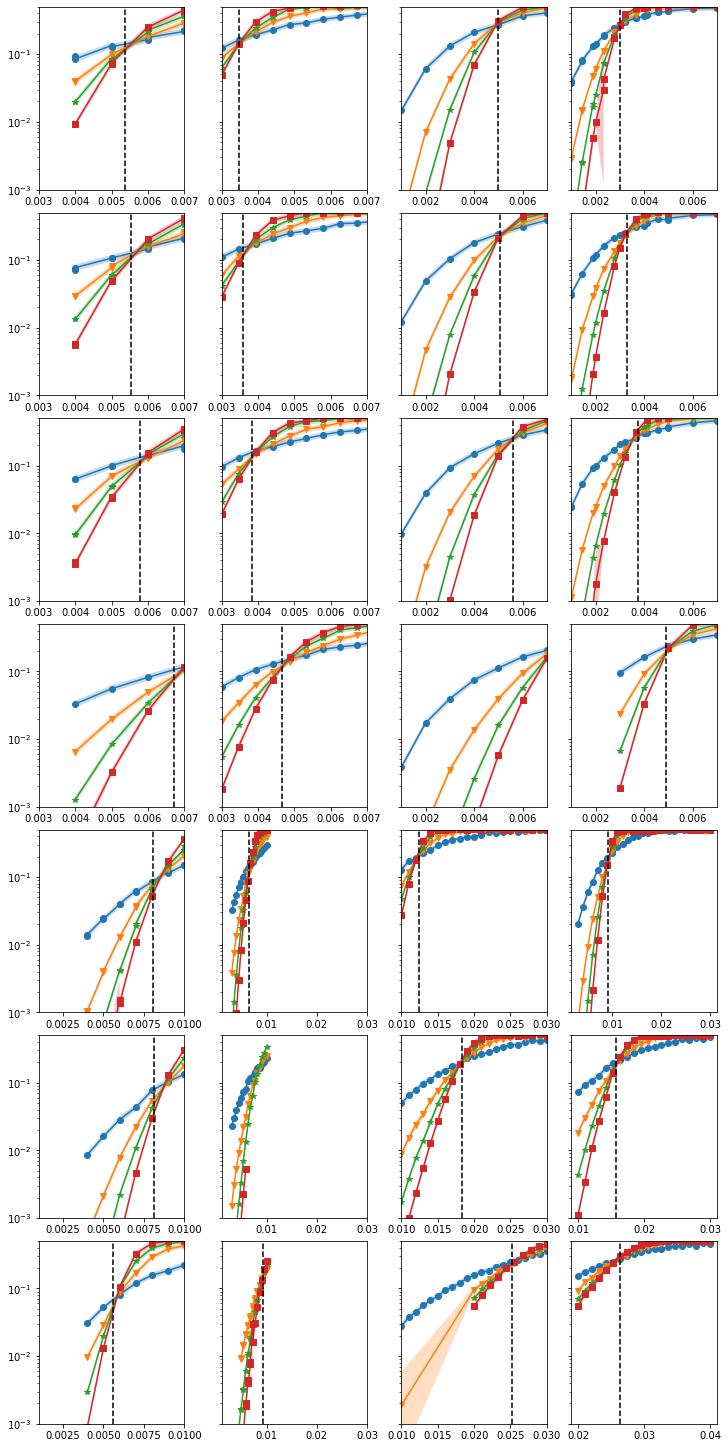

In [ ]:
fig, axis = plt.subplots(7,4,figsize=(10,20), sharey=True, constrained_layout=True)
thresholds_fcc2 = dict()
thresholds_fcc3 = dict()
thresholds_hcc3 = dict()
thresholds_hcc2 = dict()
def plot_threshold(ax, stats,filter_func):#, filter_func, x_func):
    sinter.plot_error_rate(
        ax=ax,
        stats=stats,
        group_func= lambda stat: f"d={stat.json_metadata['distance']}",
        filter_func = filter_func,
        x_func=lambda stat: stat.json_metadata['p'])
    ax.set_yscale('log')
axis[0][0].set_ylim(0.001, 0.5)

for index,bias in enumerate(biases):
    filter_func_fccg2 = lambda s : s.decoder == 'pymatching' and s.json_metadata['code'] == 'Gauge2FloquetColourCode' and s.json_metadata['bias']==bias and s.json_metadata['bias_type'] == 'measurement_vs_data_qubit'
    filter_func_fccg3 = lambda s : s.decoder == 'pymatching' and s.json_metadata['code'] == 'Gauge3FloquetColourCode' and s.json_metadata['bias']==bias and s.json_metadata['bias_type'] == 'measurement_vs_data_qubit'
    filter_func_hccg2 = lambda s : s.decoder == 'pymatching' and s.json_metadata['code'] == 'Gauge2HoneycombCode' and s.json_metadata['bias']==bias and s.json_metadata['bias_type'] == 'measurement_vs_data_qubit'
    filter_func_hccg3 = lambda s : s.decoder == 'pymatching' and s.json_metadata['code'] == 'Gauge3HoneycombCode' and s.json_metadata['bias']==bias and s.json_metadata['bias_type'] == 'measurement_vs_data_qubit'

    plot_threshold(axis[index][0], samples, filter_func_hccg2)
    plot_threshold(axis[index][1], samples, filter_func_hccg3)
    plot_threshold(axis[index][2], samples, filter_func_fccg2)
    plot_threshold(axis[index][3], samples, filter_func_fccg3)
    #if bias>0:
    #    print(get_one_threshold(samples, filter_func_fccg2, 1, 0.004, 0.007, 5))
    if bias < 7:
        thresholds_hcc2[bias] = get_one_threshold(samples, filter_func_hccg2, 1, 0.003, 0.008, 5)
        axis[index][0].axvline(x=thresholds_hcc2[bias], color="black", linestyle="dashed")

        thresholds_hcc3[bias] = get_one_threshold(samples, filter_func_hccg3, 1, 0.003, 0.008, 5)
        axis[index][1].axvline(x=thresholds_hcc3[bias], color="black", linestyle="dashed")

        thresholds_fcc2[bias] = get_one_threshold(samples, filter_func_fccg2, 1, 0.002, 0.009, 4)
        axis[index][2].axvline(x=thresholds_fcc2[bias], color="black", linestyle="dashed")
        
        thresholds_fcc3[bias] = get_one_threshold(samples, filter_func_fccg3, 1, 0.001, 0.006, 4)
        axis[index][3].axvline(x=thresholds_fcc3[bias], color="black", linestyle="dashed")


        axis[index][0].set_xlim(0.003, 0.007)
        axis[index][1].set_xlim(0.003, 0.007)
        axis[index][2].set_xlim(0.001, 0.007)
        axis[index][3].set_xlim(0.001, 0.007)
    else:
        thresholds_hcc2[bias] = get_one_threshold(samples, filter_func_hccg2, 1, 0.003, 0.01, 5)
        axis[index][0].axvline(x=thresholds_hcc2[bias], color="black", linestyle="dashed")

        thresholds_hcc3[bias] = get_one_threshold(samples, filter_func_hccg3, 1, 0.003, 0.01, 5)
        axis[index][1].axvline(x=thresholds_hcc3[bias], color="black", linestyle="dashed")

        thresholds_fcc2[bias] = get_one_threshold(samples, filter_func_fccg2, 1, 0.005, 0.03, 4)
        axis[index][2].axvline(x=thresholds_fcc2[bias], color="black", linestyle="dashed")

        thresholds_fcc3[bias] = get_one_threshold(samples, filter_func_fccg3, 1, 0.005, 0.03, 4)
        axis[index][3].axvline(x=thresholds_fcc3[bias], color="black", linestyle="dashed")

        axis[index][0].set_xlim(0.001, 0.01)
        axis[index][1].set_xlim(0.001, 0.03)
        axis[index][2].set_xlim(0.01, 0.03)

Text(0.5, 1.0, 'FCC')

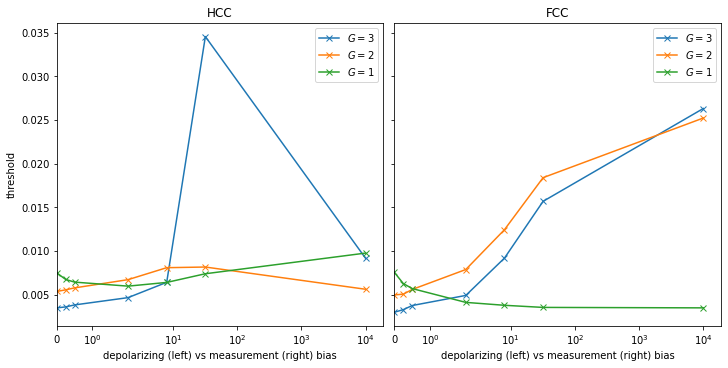

In [ ]:
# make two axis.
fig, ax = plt.subplots(1,2,figsize=(10,5), sharey=True, constrained_layout=True)

biases = [bias for bias in thresholds_fcc]

biases_fcc2 = [bias for bias in thresholds_fcc2]
biases_fcc2.sort()
biases_fcc3 = [bias for bias in thresholds_fcc3]
biases_fcc3.sort()
biases.sort()
biases_hcc3 = [bias for bias in thresholds_hcc3].sort()
plot_thresholds_hcc3 = [thresholds_hcc3[bias] for bias in biases]
plot_thresholds_hcc2 = [thresholds_hcc2[bias] for bias in biases]
plot_thresholds_fcc = [thresholds_fcc[bias] for bias in biases]
plot_thresholds_fcc2 = [thresholds_fcc2[bias] for bias in biases_fcc2]
plot_thresholds_hcc = [thresholds_hcc[bias] for bias in biases]
plot_thresholds_fcc3 = [thresholds_fcc3[bias] for bias in biases_fcc3]

ax[1].plot(biases_fcc3, plot_thresholds_fcc3, label='$G=3$', marker='x')
ax[1].plot(biases_fcc2, plot_thresholds_fcc2, label='$G=2$', marker='x')
ax[0].plot(biases, plot_thresholds_hcc3,label='$G=3$', marker='x')
ax[0].plot(biases, plot_thresholds_hcc2,label='$G=2$', marker='x')
ax[0].plot(biases, plot_thresholds_fcc,label='$G=1$', marker='x')
ax[1].plot(biases, plot_thresholds_hcc, label='$G=1$', marker='x')
for a in ax:
    a.set_xscale('symlog')
    a.set_xlabel('depolarizing (left) vs measurement (right) bias')
    a.legend()
    a.set_xlim(0,19000)
ax[0].set_ylabel('threshold')
ax[0].set_title('HCC')
ax[1].set_title('FCC')

## Depolarizing vs dephasing noise

[8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 16, 16, 16, 16, 16, 16, 16, 16]
[0.0066, 0.007533, 0.008467, 0.0094, 0.010333, 0.011267, 0.0122, 0.013133, 0.014067, 0.0066, 0.007533, 0.008467, 0.0094, 0.010333, 0.011267, 0.0122, 0.013133, 0.014067, 0.0066, 0.007533, 0.008467, 0.0094, 0.010333, 0.011267, 0.0122, 0.013133]
[0.012105076322328719, 0.02272334542941075, 0.0362254184660409, 0.05523285437684704, 0.08010590015128594, 0.11422845691382766, 0.1558422518692274, 0.18778860954335558, 0.2325889896086668, 0.00282, 0.00755, 0.016717072684369703, 0.03572918114833866, 0.06198296085936535, 0.10431881705887656, 0.15876703841387857, 0.22241566920565833, 0.2980555555555556, 0.00078, 0.00254, 0.00829, 0.02180061790174492, 0.04703094380895958, 0.09133030384032789, 0.17001295336787564, 0.2570271557884707]
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
[0.0156, 0.

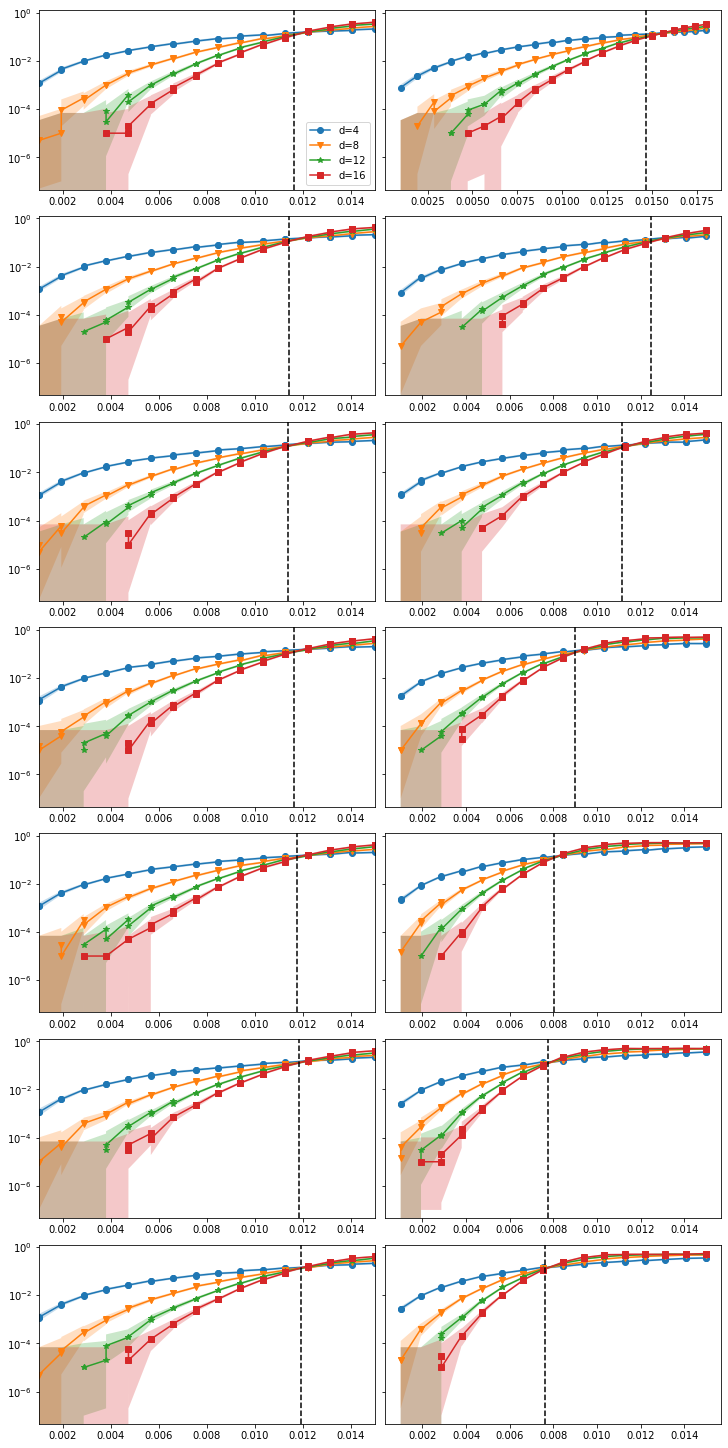

In [ ]:
fig, axis = plt.subplots(7,2,figsize=(10,20), sharey=True, constrained_layout=True)
thresholds_hcc = dict()
thresholds_fcc = dict()
thresholds_hccg2 = dict()
for index,bias in enumerate(biases):
    
    filter_func_hcc = lambda s : s.decoder == 'pymatching' and s.json_metadata['code'] == 'HoneycombCode' and s.json_metadata['bias']==bias and s.json_metadata['bias_type'] == 'depolarizing_vs_dephasing'
    filter_func_fcc = lambda s : s.decoder == 'pymatching' and s.json_metadata['code'] == 'FloquetColourCode' and s.json_metadata['bias']==bias and s.json_metadata['bias_type'] == 'depolarizing_vs_dephasing'
    plot_threshold(axis[index][0], samples,filter_func_hcc)
    plot_threshold(axis[index][1], samples, filter_func_fcc)
    thresholds_hcc[bias] = get_one_threshold(samples,filter_func_hcc, 1,0.006,0.015,5)
    thresholds_fcc[bias] = get_one_threshold(samples, filter_func_fcc,1,0.005,0.018,5)
    axis[index][0].axvline(x=thresholds_hcc[bias], color="black", linestyle="dashed")
    axis[index][1].axvline(x=thresholds_fcc[bias], color="black", linestyle="dashed")       
    axis[index][0].set_xlim(0.001,0.015)
    axis[0][0].legend()
all_thresholds_hcc['pymatching']['depolarizing_vs_dephasing'] = thresholds_hcc
all_thresholds_fcc['pymatching']['depolarizing_vs_dephasing'] = thresholds_fcc

[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
[0.00575, 0.0067, 0.00765, 0.0086, 0.00955, 0.01145, 0.0105, 0.0124, 0.0143, 0.01335, 0.01525, 0.0181, 0.0162, 0.01715, 0.00575, 0.0067, 0.00765, 0.0086, 0.00955, 0.0105, 0.01145, 0.0124, 0.01335, 0.0143, 0.0162, 0.01525, 0.01715, 0.0067, 0.00575, 0.00765, 0.0086, 0.00955, 0.0105, 0.01145, 0.01335, 0.0124, 0.0143, 0.01525]
[0.0013, 0.0046, 0.007, 0.0112, 0.022126745435016113, 0.043346337234503686, 0.03468937243771681, 0.06542526421741318, 0.12514757969303425, 0.08747855917667238, 0.159375, 0.2830188679245283, 0.1945945945945946, 0.24152542372881355, 0.0002, 0.001, 0.0022, 0.0054, 0.0104, 0.023196424771227922, 0.03972222222222222, 0.060106640814348036, 0.09229390681003584, 0.15340086830680175, 0.2345132743362832, 0.1900709219858156, 0.2905027932960894, 0.0003, 0.0, 0.0008, 0.0024, 0.0051, 0.012850904553961323, 0.027674061058642653, 0.1062951496388028

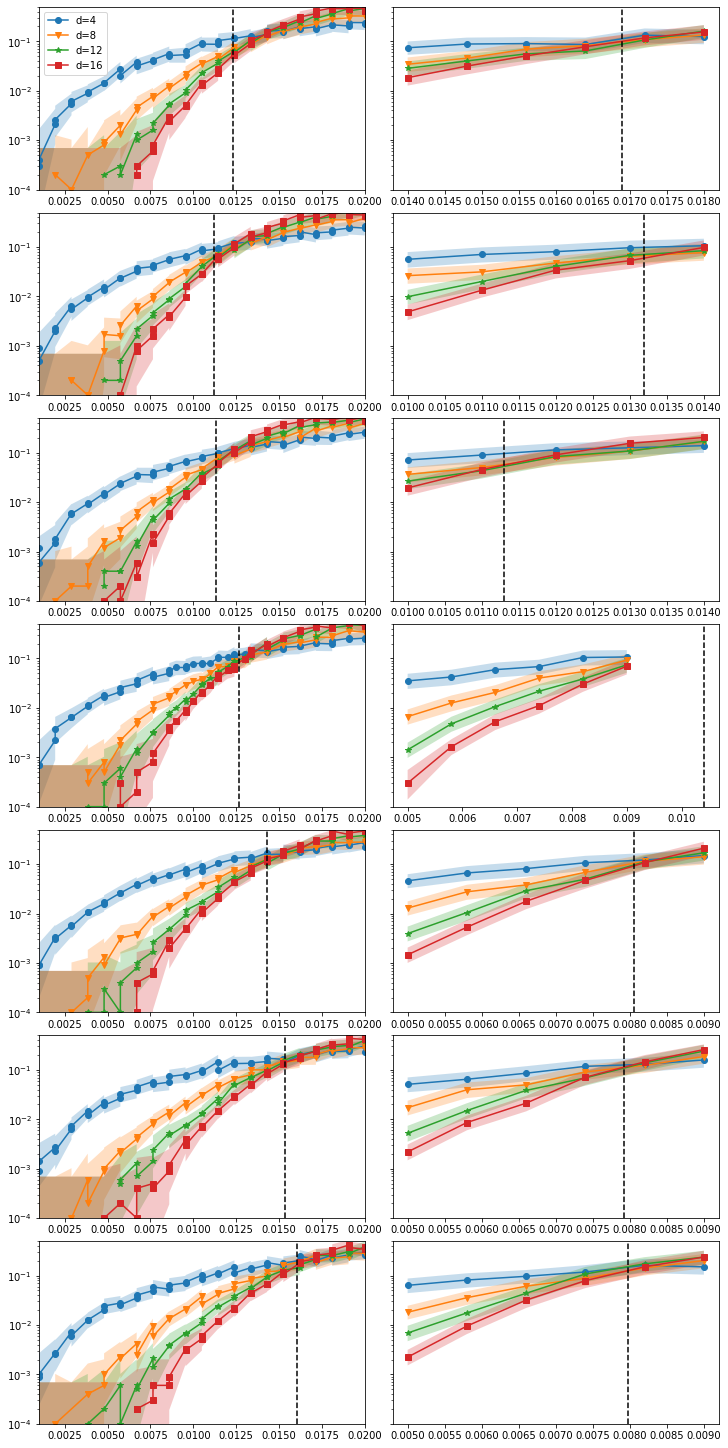

In [ ]:
fig, axis = plt.subplots(7,2,figsize=(10,20), sharey=True, constrained_layout=True)
thresholds_hcc = dict()
thresholds_fcc = dict()
thresholds_hccg2 = dict()
for index,bias in enumerate(biases):
    
    filter_func_hcc = lambda s : s.decoder == 'beliefmatching' and s.json_metadata['code'] == 'HoneycombCode' and s.json_metadata['bias']==bias and s.json_metadata['bias_type'] == 'depolarizing_vs_y'
    filter_func_fcc = lambda s : s.decoder == 'beliefmatching' and s.json_metadata['code'] == 'FloquetColourCode' and s.json_metadata['bias']==bias and s.json_metadata['bias_type'] == 'depolarizing_vs_dephasing'
    plot_threshold(axis[index][0], samples,filter_func_hcc)
    plot_threshold(axis[index][1], samples, filter_func_fcc)
    thresholds_hcc[bias] = get_one_threshold(samples,filter_func_hcc, 1,0.005,0.02,5)
    thresholds_fcc[bias] = get_one_threshold(samples, filter_func_fcc,1,0.005,0.02,5)
    axis[index][0].axvline(x=thresholds_hcc[bias], color="black", linestyle="dashed")
    axis[index][1].axvline(x=thresholds_fcc[bias], color="black", linestyle="dashed")       
    axis[index][0].set_xlim(0.001,0.02)
    axis[0][0].legend()
    axis[index][0].set_ylim(10**-4, 0.5)
    axis[index][1].set_ylim(10**-4, 0.5)
all_thresholds_hcc['beliefmatching']['depolarizing_vs_dephasing'] = thresholds_hcc
all_thresholds_fcc['beliefmatching']['depolarizing_vs_dephasing'] = thresholds_fcc

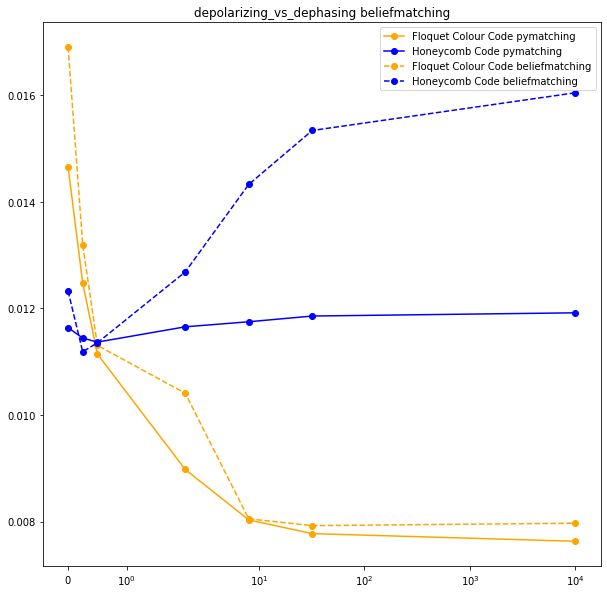

In [ ]:
def plot_bias_vs_threshold(ax, thresholds_fcc, thresholds_hcc, decoder, bias_type, linestyle):

    biases = [bias for bias in thresholds_hcc[decoder][bias_type]]
    biases.sort()
    plot_thresholds_fcc = [thresholds_fcc[decoder][bias_type][bias] for bias in biases]
    plot_thresholds_hcc = [thresholds_hcc[decoder][bias_type][bias] for bias in biases]
    ax.plot(biases, plot_thresholds_fcc, label='Floquet Colour Code ' + str(decoder), marker='o', color='orange', linestyle=linestyle)
    ax.plot(biases, plot_thresholds_hcc, label='Honeycomb Code ' + str(decoder), marker='o', color='blue', linestyle=linestyle)
    ax.set_xscale('symlog')
    ax.set_title(bias_type + " " + decoder)
    ax.legend()


fig, axs = plt.subplots(1, 1, figsize=(10, 10))


plot_bias_vs_threshold(axs, all_thresholds_fcc, all_thresholds_hcc,
                       'pymatching', 'depolarizing_vs_dephasing', 'solid')
plot_bias_vs_threshold(axs, all_thresholds_fcc, all_thresholds_hcc,
                       'beliefmatching', 'depolarizing_vs_dephasing', 'dashed')
plt.savefig('depolarizing_vs_dephasing.png')


## Depolarizing vs Y noise

[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
[0.01, 0.0067, 0.00765, 0.0086, 0.00955, 0.0105, 0.01145, 0.0124, 0.01335, 0.0143, 0.007, 0.008, 0.009, 0.011, 0.012, 0.013, 0.014, 0.01, 0.0067, 0.00765, 0.0086, 0.00955, 0.0105, 0.01145, 0.0124, 0.01335, 0.0143, 0.007, 0.008, 0.009, 0.011, 0.012, 0.013, 0.014, 0.0067, 0.00765, 0.0086, 0.00955, 0.0105, 0.01145, 0.0124, 0.01335, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013]
[0.07733910221741482, 0.01369657449217631, 0.023050052856551914, 0.041697846512014636, 0.05786540934419203, 0.08750428522454577, 0.12165822635731952, 0.15242018537590113, 0.19574780058651026, 0.24116132053383282, 0.016373124592302675, 0.028713323438748717, 0.04626545603869143, 0.10282724620183117, 0.14120054570259208, 0.17263339070567987, 0.21888865413057257, 0.05051094890510949, 0.00313, 0.00804, 0.017840325532633226, 0.0392079984316800

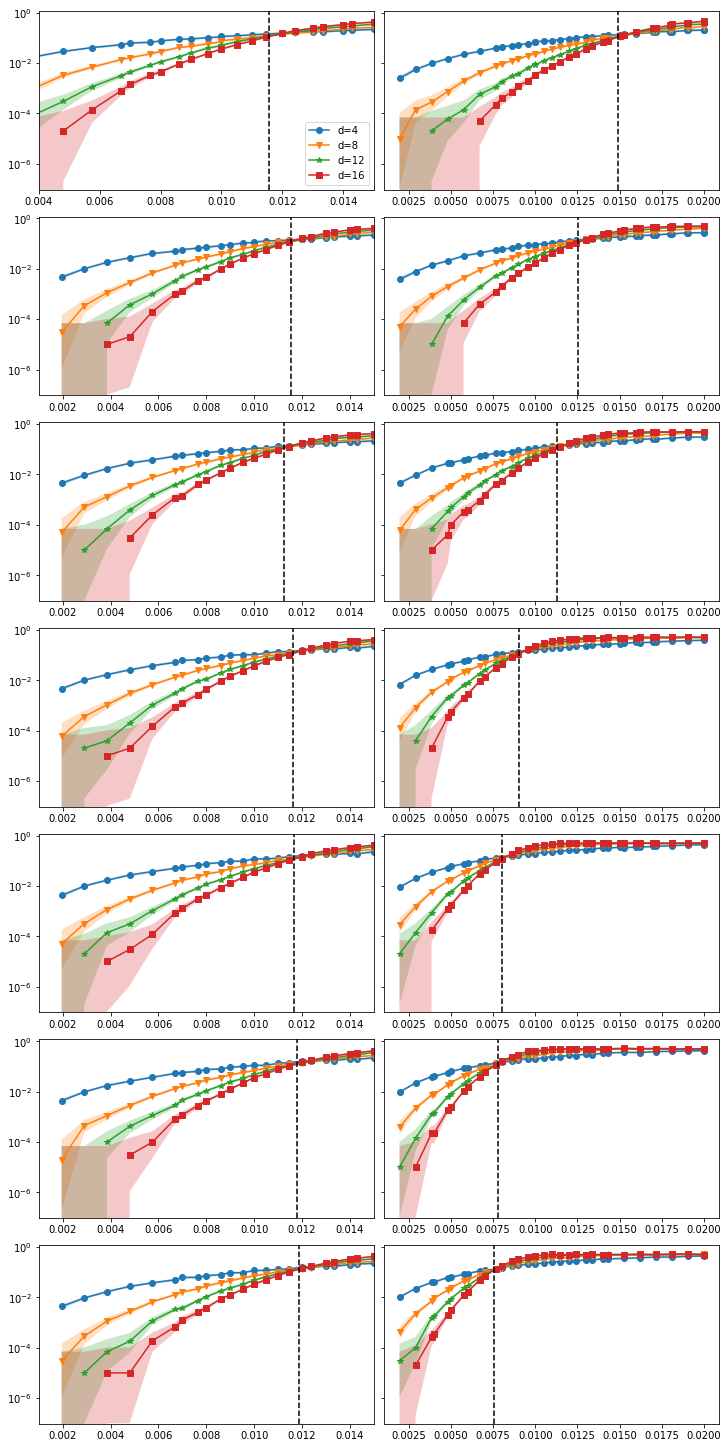

In [ ]:
fig, axis = plt.subplots(7,2,figsize=(10,20), sharey=True, constrained_layout=True)
thresholds_hcc = dict()
thresholds_fcc = dict()

for index,bias in enumerate(biases):
    filter_func_hcc = lambda s : s.decoder == 'pymatching' and s.json_metadata['code'] == 'HoneycombCode' and s.json_metadata['bias']==bias and s.json_metadata['bias_type'] == 'depolarizing_vs_y'
    filter_func_fcc = lambda s : s.decoder == 'pymatching' and s.json_metadata['code'] == 'FloquetColourCode' and s.json_metadata['bias']==bias and s.json_metadata['bias_type'] == 'depolarizing_vs_y'
    plot_threshold(axis[index][0], samples,filter_func_hcc)
    plot_threshold(axis[index][1], samples, filter_func_fcc)
    if bias == 0: 
        thresholds_hcc[bias] = get_one_threshold(samples, filter_func_hcc,1,0.006,0.015,5)
        thresholds_fcc[bias] = get_one_threshold(samples, filter_func_fcc, 1,0.006,0.02,5)
        axis[index][0].axvline(x=thresholds_hcc[bias], color="black", linestyle="dashed")
        axis[index][1].axvline(x=thresholds_fcc[bias], color="black", linestyle="dashed")        
        axis[index][0].set_xlim(0.004,0.015)
    else:
        thresholds_hcc[bias] = get_one_threshold(samples,filter_func_hcc, 1,0.006,0.015,5)
        thresholds_fcc[bias] = get_one_threshold(samples, filter_func_fcc,1,0.005,0.015,5)
        axis[index][0].axvline(x=thresholds_hcc[bias], color="black", linestyle="dashed")
        axis[index][1].axvline(x=thresholds_fcc[bias], color="black", linestyle="dashed")       
        axis[index][0].set_xlim(0.001,0.015)
    axis[0][0].legend()

all_thresholds_hcc['pymatching']['depolarizing_vs_y'] = thresholds_hcc
all_thresholds_fcc['pymatching']['depolarizing_vs_y'] = thresholds_fcc

[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 16, 16, 16, 16, 16, 16, 16, 16, 16]
[0.00765, 0.0086, 0.00955, 0.01145, 0.0105, 0.0124, 0.0143, 0.01335, 0.01525, 0.0162, 0.00765, 0.0086, 0.00955, 0.0105, 0.01145, 0.0124, 0.01335, 0.0143, 0.0162, 0.01525, 0.00765, 0.0086, 0.00955, 0.0105, 0.01145, 0.01335, 0.0124, 0.0143, 0.01525]
[0.007, 0.0112, 0.022126745435016113, 0.043346337234503686, 0.03468937243771681, 0.06542526421741318, 0.12514757969303425, 0.08747855917667238, 0.159375, 0.1945945945945946, 0.0022, 0.0054, 0.0104, 0.023196424771227922, 0.03972222222222222, 0.060106640814348036, 0.09229390681003584, 0.15340086830680175, 0.2345132743362832, 0.1900709219858156, 0.0008, 0.0024, 0.0051, 0.012850904553961323, 0.027674061058642653, 0.10629514963880289, 0.05235350624399616, 0.15514592933947774, 0.21142857142857144]
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
[0.00765, 0.0086, 0.00955, 0.0105, 0.

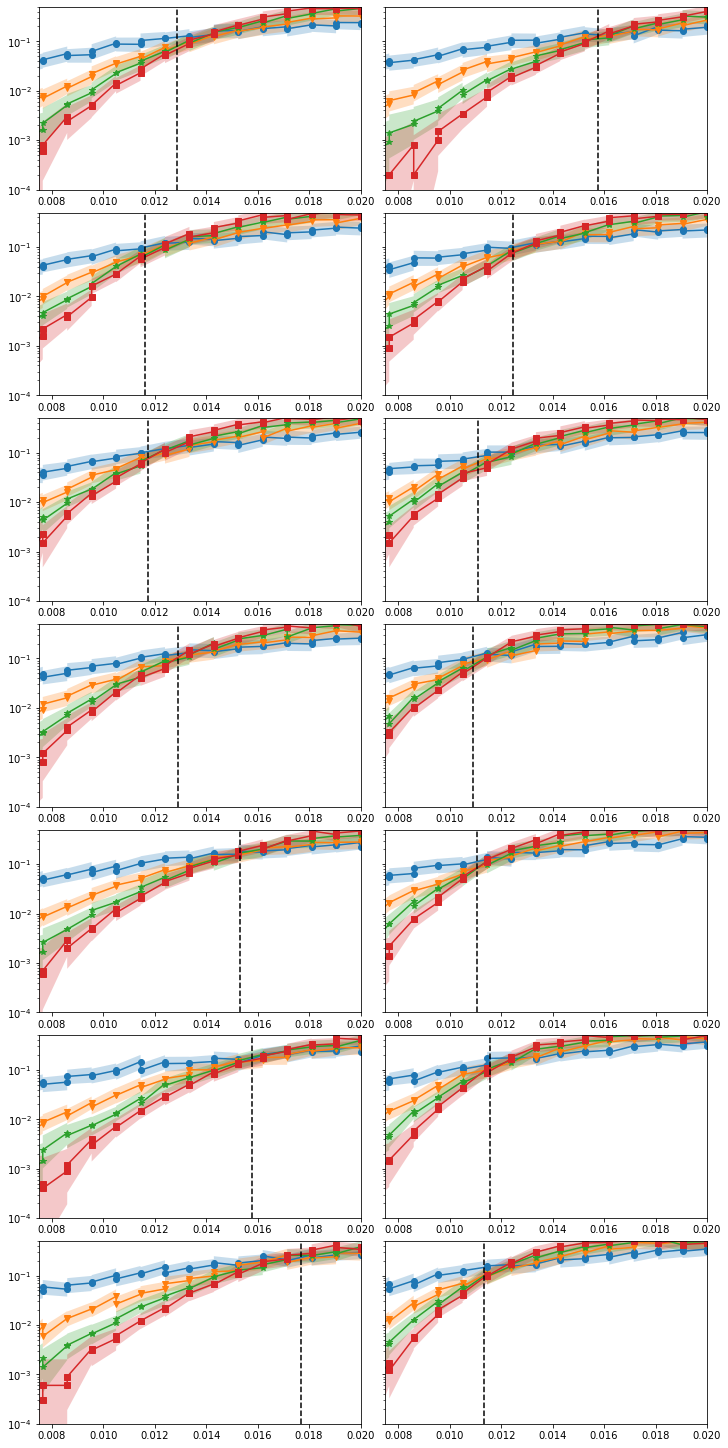

In [ ]:
fig, axis = plt.subplots(7, 2, figsize=(10, 20), sharey=True, constrained_layout=True)
thresholds_hcc = dict()
thresholds_fcc = dict()


def filter_func_hcc(s): return s.decoder == 'beliefmatching' and s.json_metadata[
    'code'] == 'HoneycombCode' and s.json_metadata['bias'] == bias and s.json_metadata['bias_type'] == 'depolarizing_vs_y'


def filter_func_fcc(s): return s.decoder == 'beliefmatching' and s.json_metadata[
    'code'] == 'FloquetColourCode' and s.json_metadata['bias'] == bias and s.json_metadata['bias_type'] == 'depolarizing_vs_y'


for index, bias in enumerate(biases):
    plot_threshold(axis[index][0], samples, filter_func_hcc)
    plot_threshold(axis[index][1], samples, filter_func_fcc)
    thresholds_hcc[bias] = get_one_threshold(samples, filter_func_hcc, 1, 0.0075, 0.017, 5)
    thresholds_fcc[bias] = get_one_threshold(samples, filter_func_fcc, 1, 0.0075, 0.017, 5)
    axis[index][0].axvline(x=thresholds_hcc[bias], color="black", linestyle="dashed")
    axis[index][1].axvline(x=thresholds_fcc[bias], color="black", linestyle="dashed")
    axis[index][0].set_xlim(0.0075, 0.02)
    axis[index][1].set_xlim(0.0075, 0.02)
    axis[index][0].set_ylim(10**-4, 0.5)
    axis[index][1].set_ylim(10**-4, 0.5)

all_thresholds_hcc['beliefmatching']['depolarizing_vs_y'] = thresholds_hcc
all_thresholds_fcc['beliefmatching']['depolarizing_vs_y'] = thresholds_fcc


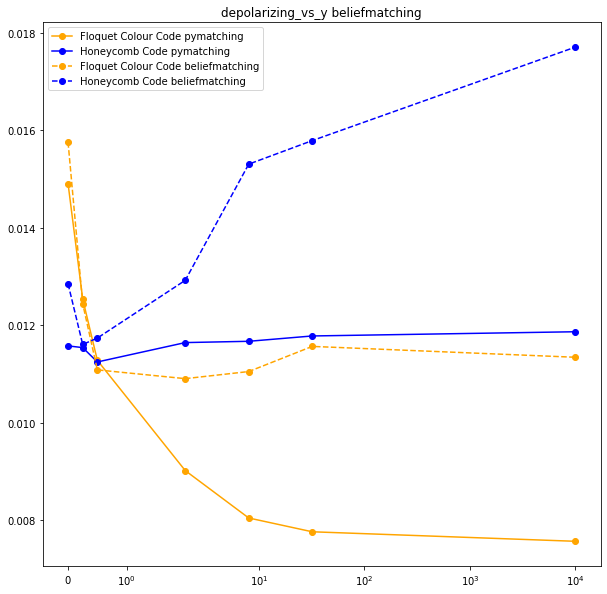

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))

plot_bias_vs_threshold(axs, all_thresholds_fcc, all_thresholds_hcc,
                       'pymatching', 'depolarizing_vs_y', 'solid')
plot_bias_vs_threshold(axs, all_thresholds_fcc, all_thresholds_hcc,
                       'beliefmatching', 'depolarizing_vs_y', 'dashed')
plt.savefig('depolarizing_vs_dephasing.png')

# Depolarizing vs measurement

[8, 8, 8, 8, 8, 8, 8, 8, 12, 12, 12, 12, 12, 12, 12, 16, 16, 16, 16, 16, 16]
[0.0048, 0.0067, 0.00575, 0.00765, 0.0086, 0.00955, 0.0105, 0.01145, 0.0048, 0.00575, 0.00955, 0.00765, 0.0086, 0.0067, 0.0105, 0.0048, 0.00575, 0.0067, 0.00765, 0.0086, 0.00955]
[0.0083, 0.043329532497149374, 0.020942408376963352, 0.07186440677966102, 0.11006289308176101, 0.17320703653585928, 0.2934472934472934, 0.2961038961038961, 0.0028, 0.0099, 0.2230769230769231, 0.07285714285714286, 0.14614343707713126, 0.025795356835769563, 0.2905027932960894, 0.0011, 0.0058, 0.022139498432601882, 0.06675392670157068, 0.14534883720930233, 0.2680965147453083]
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
[0.004733, 0.005667, 0.0066, 0.007533, 0.008467, 0.0094, 0.010333, 0.011267, 0.0048, 0.00575, 0.0067, 0.00955, 0.00765, 0.0086, 0.0105, 0.01145, 0.004733, 0.005667, 0.0066, 0.007533, 0.008467, 0.0094, 0.010333, 0.0048, 

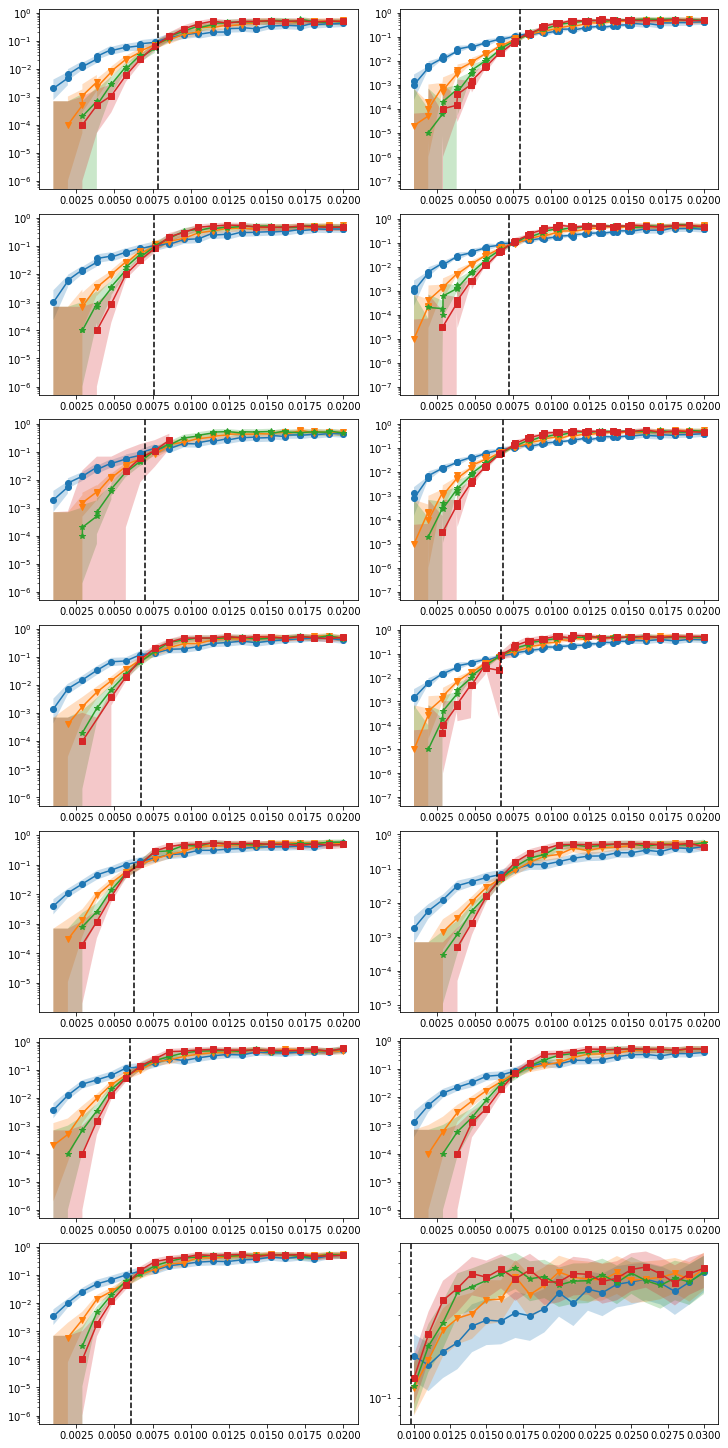

In [ ]:
fig, axis = plt.subplots(7,2,figsize=(10,20), constrained_layout=True)
thresholds_hcc = dict()
thresholds_fcc = dict()
filter_func_hcc = lambda s : s.decoder == 'beliefmatching' and s.json_metadata['code'] == 'HoneycombCode' and s.json_metadata['bias']==bias and s.json_metadata['bias_type'] == 'measurement_vs_data_qubit'
filter_func_fcc = lambda s : s.decoder == 'beliefmatching' and s.json_metadata['code'] == 'FloquetColourCode' and s.json_metadata['bias']==bias and s.json_metadata['bias_type'] == 'measurement_vs_data_qubit'
for index,bias in enumerate(biases):
    plot_threshold(axis[index][0], samples, filter_func_hcc)
    plot_threshold(axis[index][1], samples, filter_func_fcc)
    thresholds_hcc[bias] = get_one_threshold(samples, filter_func_hcc, 1,0.004,0.015,5)
    thresholds_fcc[bias] = get_one_threshold(samples, filter_func_fcc, 1,0.004,0.012,5)
    axis[index][0].axvline(x=thresholds_hcc[bias], color="black", linestyle="dashed")
    axis[index][1].axvline(x=thresholds_fcc[bias], color="black", linestyle="dashed")  
    #axis[index][0].set_xlim(0.005,0.01)
    #axis[index][1].set_xlim(0.005,0.012)

all_thresholds_hcc['beliefmatching']['depolarizing_vs_measurement'] = thresholds_hcc
all_thresholds_fcc['beliefmatching']['depolarizing_vs_measurement'] = thresholds_fcc


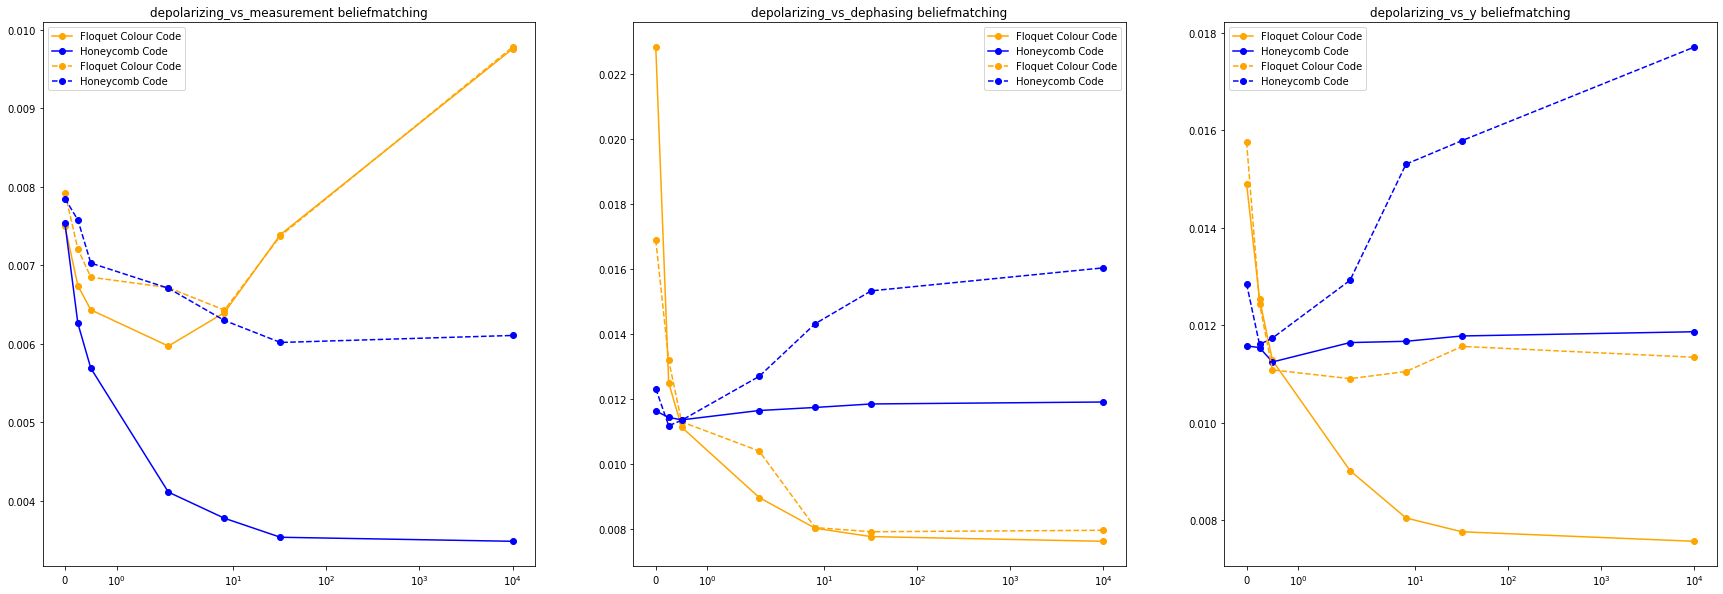

In [ ]:
def plot_bias_vs_threshold(ax, thresholds_fcc, thresholds_hcc, decoder, bias_type, linestyle):
    
    biases = [bias for bias in thresholds_hcc[decoder][bias_type]]
    biases.sort()
    plot_thresholds_fcc = [thresholds_fcc[decoder][bias_type][bias] for bias in biases]
    plot_thresholds_hcc = [thresholds_hcc[decoder][bias_type][bias] for bias in biases]
    ax.plot(biases, plot_thresholds_fcc,label='Floquet Colour Code', marker='o', linestyle=linestyle, color='orange')
    ax.plot(biases, plot_thresholds_hcc,label='Honeycomb Code', marker='o', linestyle=linestyle, color='blue')
    ax.set_xscale('symlog')
    ax.set_title(bias_type + " " + decoder) 
    ax.legend()
    
fig, axs = plt.subplots(1,3,figsize=(30,10))

plot_bias_vs_threshold(axs[0], all_thresholds_fcc, all_thresholds_hcc, 'pymatching', 'depolarizing_vs_measurement','solid')
plot_bias_vs_threshold(axs[1], all_thresholds_fcc, all_thresholds_hcc, 'pymatching', 'depolarizing_vs_dephasing','solid')
plot_bias_vs_threshold(axs[2], all_thresholds_fcc, all_thresholds_hcc, 'pymatching', 'depolarizing_vs_y','solid')

plot_bias_vs_threshold(axs[0], all_thresholds_fcc, all_thresholds_hcc, 'beliefmatching', 'depolarizing_vs_measurement','dashed')
plot_bias_vs_threshold(axs[1], all_thresholds_fcc, all_thresholds_hcc, 'beliefmatching', 'depolarizing_vs_dephasing','dashed')
plot_bias_vs_threshold(axs[2], all_thresholds_fcc, all_thresholds_hcc, 'beliefmatching', 'depolarizing_vs_y','dashed')

